# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:

diabetes_data=pd.read_csv("diabetes.csv")
diabetes_df=pd.DataFrame(diabetes_data)
diabetes_df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

<Axes: >

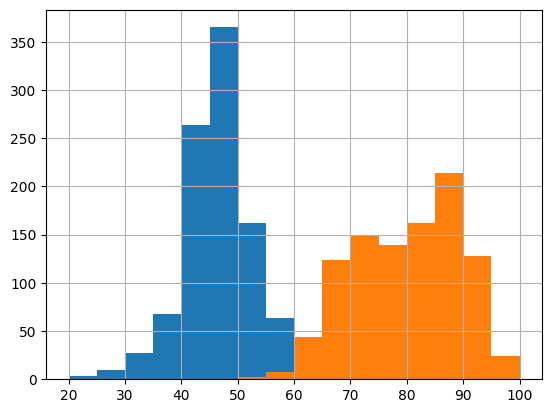

In [ ]:
diabetes_df["glucose"].hist()
diabetes_df["bloodpressure"].hist()

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [ ]:
X,y=diabetes_df.iloc[:,:-1],diabetes_df.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=49)
clf=GaussianNB()
clf.fit(X,y)
y_pred=clf.predict(X_test)
print("The accuracy of the model is",accuracy_score(y_test,y_pred))

The accuracy of the model is 0.97


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
insurance_data=pd.read_csv("insurance.csv")
insurance_df=pd.DataFrame(insurance_data)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [ ]:
le=LabelEncoder()
le.fit(insurance_df['sex'])
insurance_df['sex']=le.transform(insurance_df['sex'])
le.fit(insurance_df['smoker'])
insurance_df['smoker']=le.transform(insurance_df['smoker'])
le.fit(insurance_df['region'])
insurance_df['region']=le.transform(insurance_df['region'])

In [ ]:
scaler=MinMaxScaler()
insurance_df['charges']=scaler.fit_transform(insurance_df['charges'].values.reshape(-1,1))
insurance_df['bmi']=scaler.fit_transform(insurance_df['bmi'].values.reshape(-1,1))

### 5. Split the data.

In [ ]:
X,y=insurance_df.iloc[:,:-1],insurance_df.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1, random_state=42)

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [ ]:
svr = SVR()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}
random_search = RandomizedSearchCV(svr, param_grid, cv=3)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_

In [ ]:
best_svr = SVR(kernel=best_params['kernel'], gamma=best_params['gamma'])
best_svr.fit(X_train, y_train)
y_pred = best_svr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("Best Parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)

Best Parameters: {'kernel': 'linear', 'gamma': 0.01}
MAE: 0.07284969883398365
MSE: 0.008388001143503776


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

ada_boost = AdaBoostRegressor()

parameters = {
    'n_estimators': [50,100,200,300],
    'loss': ['linear', 'square', 'exponential']
}

grid_search = GridSearchCV(ada_boost, parameters, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_ada_boost = AdaBoostRegressor(n_estimators=best_params['n_estimators'], loss=best_params['loss'])

best_ada_boost.fit(X_train, y_train)

y_pred = best_ada_boost.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)

Best Parameters: {'loss': 'linear', 'n_estimators': 100}
MAE: 0.0585038407982221
MSE: 0.005875700736171394


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(random_forest, param_grid, cv=3)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_rf = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf']
)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Best Parameters:", best_params_rf)
print("MAE:", mae_rf)
print("MSE:", mse_rf)

Random Forest Regressor:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 50}
MAE: 0.03631172988727665
MSE: 0.004419587816777098


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10]
}

grid_search_gb = GridSearchCV(gradient_boosting, param_grid, cv=3)
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_gb = GradientBoostingRegressor(
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    max_depth=best_params_gb['max_depth']
)
best_gb.fit(X_train, y_train)
y_pred_gb = best_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print("Best Parameters:", best_params_gb)
print("MAE:", mae_gb)
print("MSE:", mse_gb)

Gradient Boosting Regression:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MAE: 0.03670537267968735
MSE: 0.004347268426034064


In [ ]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10]
}

grid_search_xgb = GridSearchCV(xgb_regressor, param_grid, cv=3)
grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
best_xgb = xgb.XGBRegressor(
    n_estimators=best_params_xgb['n_estimators'],
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth']
)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("XGBoost Regressor:")
print("Best Parameters:", best_params_xgb)
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)

XGBoost Regressor:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MAE: 0.03862980466992265
MSE: 0.0044147708225710505


In [ ]:
errors = {'Random Forest': (mae_rf, mse_rf),
          'Gradient Boosting': (mae_gb, mse_gb),
          'XGBoost': (mae_xgb, mse_xgb)}

min_mae_model = min(errors, key=lambda x: errors[x][0])
min_mse_model = min(errors, key=lambda x: errors[x][1])

print("Model with the least MAE:", min_mae_model)
print("Model with the least MSE:", min_mse_model)

Model with the least MAE: Random Forest
Model with the least MSE: Gradient Boosting


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
bms_data=pd.read_csv("bookmyshow_ads.csv")
bms_df=pd.DataFrame(bms_data)
bms_df=bms_df.drop(['index'],axis=1)
bms_df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,1,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,0
1,1,1,1,1,1,0,-1,1,0,1,...,1,1,0,0,-1,0,1,1,1,0
2,1,-1,1,1,1,0,0,0,0,1,...,1,1,1,0,1,0,1,-1,0,0
3,1,-1,1,1,1,0,0,0,1,1,...,1,1,0,0,1,0,1,0,1,0
4,1,-1,0,1,1,0,1,1,0,1,...,0,1,0,0,-1,0,1,1,1,1


### 2. Split the data.

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [ ]:
X,y=bms_df.iloc[:,:-1],bms_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy of SKlearn's Decision Tree Classifier",accuracy_score(y_test,y_pred))

Accuracy of SKlearn's Decision Tree Classifier 0.9683544303797469


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy of SKlearn's RandomForest Classifier",accuracy_score(y_test,y_pred))

Accuracy of SKlearn's RandomForest Classifier 0.9783001808318263


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy of SKlearn's AdaBoost Classifier",accuracy_score(y_test,y_pred))

Accuracy of SKlearn's AdaBoost Classifier 0.9385171790235082


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy of SKlearn's Gradient Boost Classifier",accuracy_score(y_test,y_pred))

Accuracy of SKlearn's Gradient Boost Classifier 0.9421338155515371


In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(X_train,y_train)
clf.predict(X_test)
print("Accuracy of XGB Classifier",accuracy_score(y_test,y_pred))

Accuracy of XGB Classifier 0.9421338155515371


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.

### 1. Import the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [2]:
segmentation_data=pd.read_csv("segmentation data.csv")
segmentation_df=pd.DataFrame(segmentation_data)
segmentation_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [3]:
segmentation_df=segmentation_df.drop(['ID'],axis=1)
segmentation_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [4]:
segmentation_df.isnull().sum()
#Literally clean data

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
segmentation_df['Age']=scalar.fit_transform(segmentation_df['Age'].values.reshape(-1,1))
segmentation_df['Education']=scalar.fit_transform(segmentation_df['Education'].values.reshape(-1,1))
segmentation_df['Income']=scalar.fit_transform(segmentation_df['Income'].values.reshape(-1,1))
segmentation_df['Occupation']=scalar.fit_transform(segmentation_df['Occupation'].values.reshape(-1,1))
segmentation_df['Settelement size']=scalar.fit_transform(segmentation_df['Settlement size'].values.reshape(-1,1))
segmentation_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Settelement size
0,0,0,0.844828,0.666667,0.324781,0.5,2,1.0
1,1,1,0.068966,0.333333,0.420210,0.5,2,1.0
2,0,0,0.534483,0.333333,0.195144,0.0,0,0.0
3,0,0,0.465517,0.333333,0.496223,0.5,1,0.5
4,0,0,0.603448,0.333333,0.413842,0.5,1,0.5


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

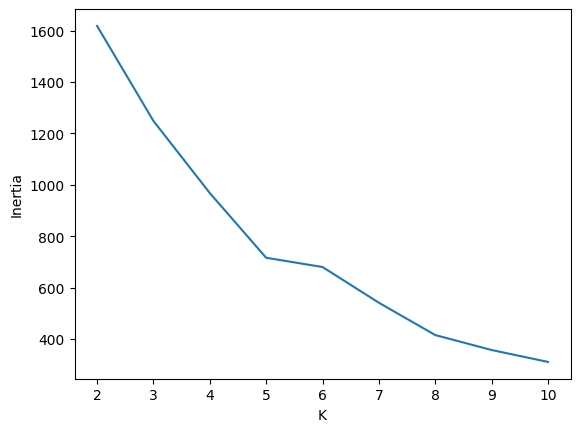

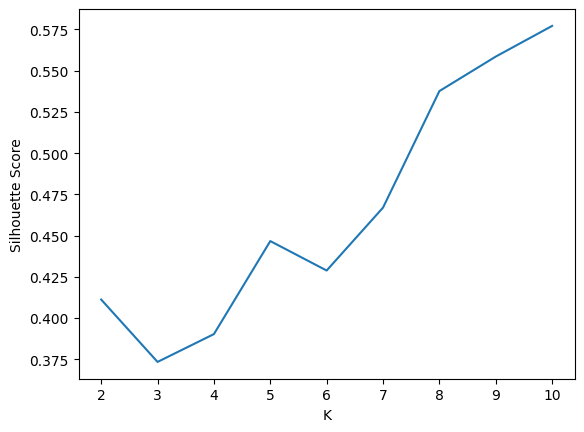

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range=range(2,11)
inertia_scores=[]
silhouette_scores=[]
SK_labels=[]

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42, n_init='auto')
    kmeans.fit(segmentation_df)
    inertia_scores.append(kmeans.inertia_)
    SK_labels.append(kmeans.labels_)
    silhouette_scores.append(silhouette_score(segmentation_df,kmeans.labels_))

plt.plot(k_range,inertia_scores)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

plt.plot(k_range,silhouette_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [ ]:
kmeans = KMeans(n_clusters=4,n_init='auto', random_state=42)
kmeans.fit(segmentation_df)
inertia = kmeans.inertia_
labels = kmeans.labels_

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [ ]:
class MyKMeans:
    def __init__(self, k, max_iter=100):
        self.k=k
        self.max_iter=max_iter

    def fit(self,X):
        n_samples,n_features=X.shape
        self.centroids=np.random.randn(self.k, n_features)
        for i in range(self.max_iter):
            distances=np.sqrt(((X-self.centroids[:,np.newaxis])**2).sum(axis=2))
            labels=np.argmin(distances, axis=0)

            centroids=np.array([X[labels == k].mean(axis=0) for k in range(self.k)])

            if np.allclose(self.centroids, centroids):
                break

            self.centroids=centroids

        self.labels_=labels


In [ ]:
best_accuracy=0.0

for k1 in k_range:
    sklearn_kmeans=KMeans(n_clusters=k1, random_state=42)
    sklearn_kmeans.fit(segmentation_df)
    sklearn_labels=sklearn_kmeans.labels_


    custom_kmeans=MyKMeans(k=k1)
    custom_kmeans.fit(segmentation_df.values)

    accuracy=accuracy_score(sklearn_labels, custom_kmeans.labels_)

    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_labels=custom_kmeans.labels_
        best_k=k

print("Best K: ", best_k)
print("Accuracy: ", best_accuracy)
print("Custom K-means Labels: ", best_labels)
print("Sklearn K-means Labels: ", sklearn_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-0156d9e8f73c>:13: RuntimeWarning: Mean of empty slice.
  centroids=np.array([X[labels == k].mean(axis=0) for k in range(self.k)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-0156d9e8f73c>:13: RuntimeWarning: Mean of empty slice.
  centroids=np.array([X[labels == k].mean(axis=0) for k in range(self.k)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: inval

Best K:  10
Accuracy:  0.4945
Custom K-means Labels:  [1 1 1 ... 1 1 1]
Sklearn K-means Labels:  [0 4 5 ... 5 1 5]


### 7. DBSCAN model training - Scikit-Learn

Using sklearn.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values=[0.1,0.2,0.5,1,2]
min_samples_values=[3,4,5,6]

best_score=-1
best_eps=None
best_min_samples=None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(segmentation_df)
        unique_labels = np.unique(dbscan.labels_)
        if len(unique_labels) < 2:
            continue
        score = silhouette_score(segmentation_df, dbscan.labels_)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print("Best silhouette score:", best_score)
print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)


Best silhouette score: 0.6273774655277089
Best epsilon: 0.2
Best min_samples: 3


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [6]:
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_array


def Mydbscan(X, eps, min_samples):
    X = check_array(X)
    n_samples, n_features = X.shape
    labels = np.zeros(n_samples, dtype=int)
    visited = np.zeros(n_samples, dtype=bool)
    current_label = 0

    def region_query(X, center, eps):
        return pairwise_distances(X, [center]).ravel() <= eps

    def expand_cluster(X, labels, point_id, neighbors, current_label, eps, min_samples):
        labels[point_id] = current_label
        i = 0
        while i < len(neighbors):
            neighbor_id = neighbors[i]
            if not visited[neighbor_id]:
                visited[neighbor_id] = True
                point_neighbors = region_query(X, X[neighbor_id], eps)
                if np.any(point_neighbors) and np.sum(point_neighbors) >= min_samples:
                    new_neighbors = np.where(point_neighbors)[0]
                    neighbors = np.concatenate((neighbors, new_neighbors))
                    labels[neighbor_id] = current_label
            i += 1

    for point_id in range(n_samples):
        if visited[point_id]:
            continue
        visited[point_id] = True
        neighbors = region_query(X, X[point_id], eps)
        if np.sum(neighbors) < min_samples:
            labels[point_id] = -1  # Noise point
        else:
            current_label += 1
            expand_cluster(X, labels, point_id, neighbors, current_label, eps, min_samples)

    return labels

In [ ]:
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

best_score=-1
best_eps=None
best_min_samples=None

for eps in eps_values:
    for min_samples in min_samples_values:
        labels=Mydbscan(segmentation_df, eps, min_samples)
        unique_labels = np.unique(labels)
        if len(unique_labels) < 2:
            continue


        score = silhouette_score(segmentation_df, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print("Best silhouette score:", best_score)
print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)